In [1]:
pip install mat4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import numpy as np
from mat4py import loadmat
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split

In [3]:
# here I load in label arrays from Matlab (training)
# 
training_num = 100 # number of training data 
resolution = 100 # number of pixels across the edge

labels = loadmat('training_label.mat');
labels = np.array(list(labels.values())) # make it an array
labels_array = np.zeros((training_num, 2)) # make an array to store it

for i in range(training_num):
  labels_array[i,0] = labels[0,i,0] # F 
  labels_array[i,1] = labels[0,i,1] # k 

#print(labels.shape)
print(labels_array.shape)
#print(len(labels_array))
#print(labels_array)

(100, 2)


In [4]:
# here I load in label arrays from Matlab (testing)
# 
training_num_testing = 25 # number of training data 
resolution = 100 # number of pixels across the edge

labels_testing = loadmat('training_RT_label.mat');
labels_testing = np.array(list(labels_testing.values())) # make it an array
labels_testing_array = np.zeros((training_num_testing, 2)) # make an array to store it

for i in range(training_num_testing):
  labels_testing_array[i,0] = labels_testing[0,i,0] # F 
  labels_testing_array[i,1] = labels_testing[0,i,1] # k 

#print(labels.shape)
print(labels_testing_array.shape)
#print(len(labels_array))
#print(labels_testing_array)



(25, 2)


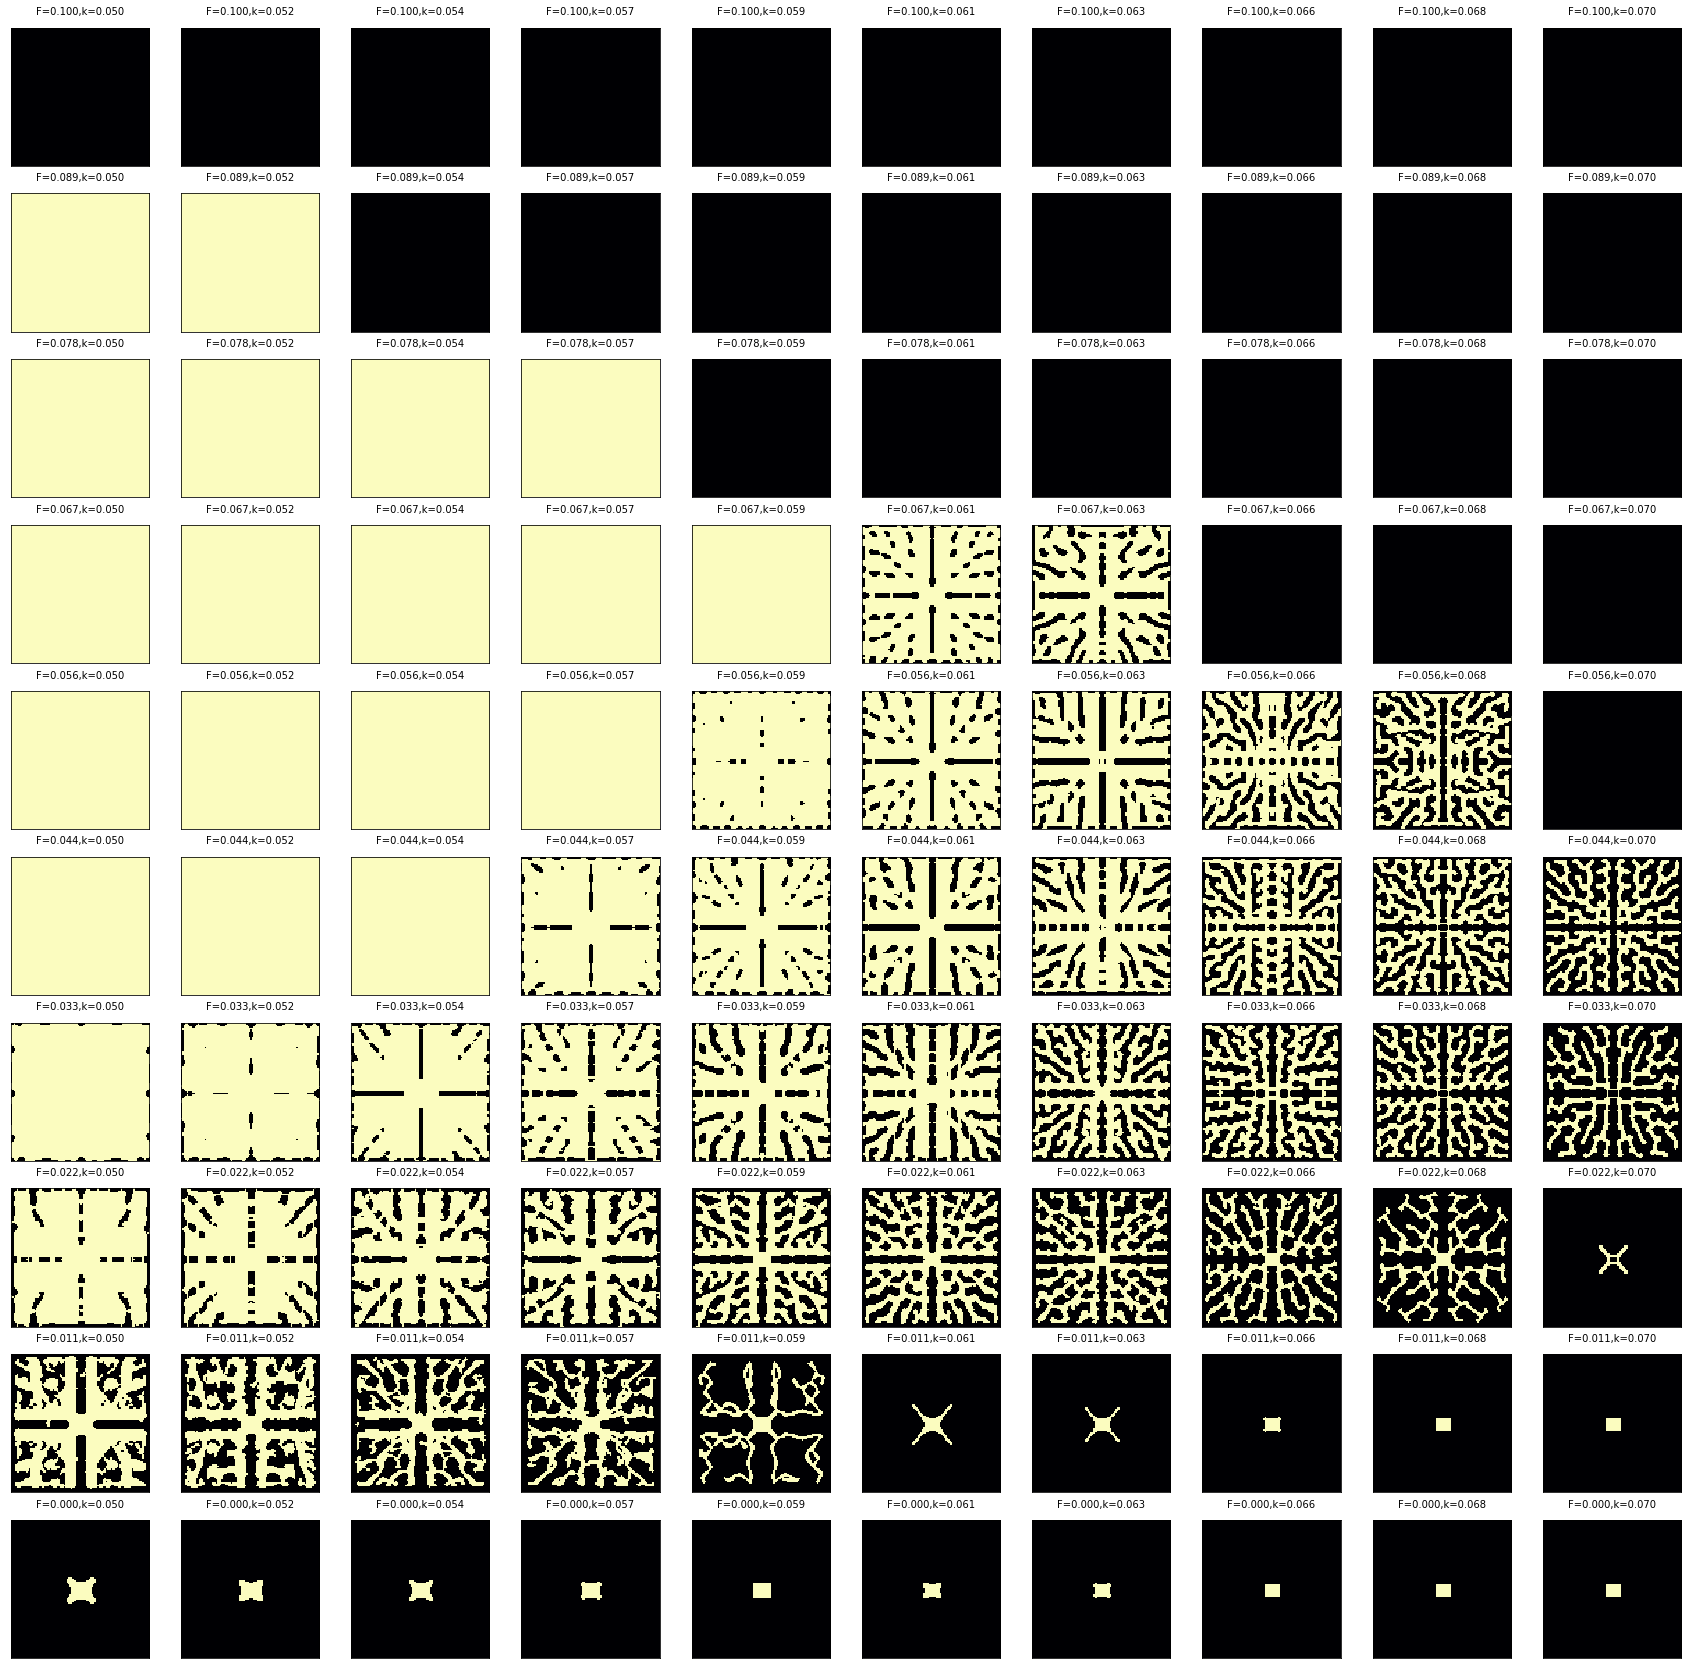

In [5]:
# here I load in simulated patterns from abaqus 
#
# pattern matrix that store all training data 
patterns_mat = np.zeros((training_num,resolution,resolution)) 


for i in range(training_num):
 name = "training_data%d.mat" %(i+1)
 patterns = loadmat(name);
 patterns = np.array(list(patterns.values())) # make it an array
 patterns_mat[i,:,:] = patterns[0,:,:]

 #plt.matshow(patterns_mat[3,:,:])

# Plot out all the training images 
subfigure_num= 10 
fig, axs = plt.subplots(subfigure_num, subfigure_num)
fig.set_size_inches(30, 30)

i = 0 
for j in range(subfigure_num):
  for k in range(subfigure_num):
    axs[(subfigure_num-1)-j, k].matshow(patterns_mat[i,:,:],cmap='magma',vmin=0, vmax=1.0)
    axs[(subfigure_num-1)-j, k].set_title('F=%.3f,k=%.3f'%(labels_array[i,0],labels_array[i,1]),fontsize=10)
    axs[(subfigure_num-1)-j, k].axes.get_xaxis().set_ticks([])
    axs[(subfigure_num-1)-j, k].axes.get_yaxis().set_ticks([])
    i = i + 1 

 
 


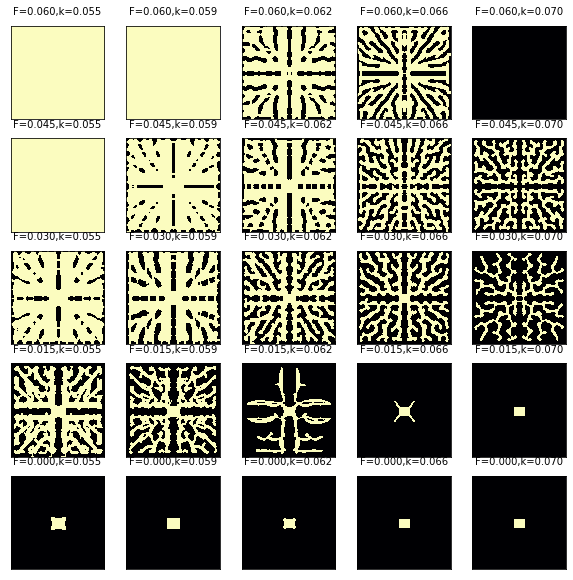

In [6]:
# here I load in simulated patterns from abaqus (testing)
#
# pattern matrix that store all testing data 
patterns_mat_testing = np.zeros((training_num_testing,resolution,resolution)) 


for i in range(training_num_testing):
 name = "training_RT_data%d.mat" %(i+1)
 patterns = loadmat(name);
 patterns = np.array(list(patterns.values())) # make it an array
 patterns_mat_testing[i,:,:] = patterns[0,:,:]


# Plot out all the training images 
subfigure_num= 5 
fig, axs = plt.subplots(subfigure_num, subfigure_num)
fig.set_size_inches(10, 10)


i = 0 
for j in range(subfigure_num):
  for k in range(subfigure_num):
    axs[(subfigure_num-1)-j, k].matshow(patterns_mat_testing[i,:,:],cmap='magma',vmin=0, vmax=1.0)
    axs[(subfigure_num-1)-j, k].set_title('F=%.3f,k=%.3f'%(labels_testing_array[i,0],labels_testing_array[i,1]),fontsize=10)
    axs[(subfigure_num-1)-j, k].axes.get_xaxis().set_ticks([])
    axs[(subfigure_num-1)-j, k].axes.get_yaxis().set_ticks([])
    i = i + 1




In [7]:
# Here I like to get rid of ``zeros'' and ``ones'' patterns before feeding into the CNN 
# (training)
def find_sum(A):
# return the trace of the 2 by 2 matrix  
  sum = 0.0 
  for i in range(len(A)):
    for j in range(len(A)): 
      sum = sum + A[i,j]
  return sum 


# select good patterns 
n = 0 
for i in range(training_num):
  sum = find_sum(patterns_mat[i,:,:])
  if (sum > 150 and sum < 8600):
    n = n + 1 
#print(n)

patterns_mat_store = np.zeros((n,resolution,resolution)) 
labels_array_store = np.zeros((n,2))
n = 0 
for i in range(training_num):
  sum = find_sum(patterns_mat[i,:,:])
  if (sum > 150 and sum < 8600):
    patterns_mat_store[n,:,:] = patterns_mat[i,:,:]
    labels_array_store[n,0] = labels_array[i,0]
    labels_array_store[n,1] = labels_array[i,1]
    #plt.matshow(patterns_mat_nonzero[n,:,:])
    #plt.title('number=%d'%n)
    n = n + 1 

print(patterns_mat_store.shape)
print(labels_array_store.shape)





(40, 100, 100)
(40, 2)


In [8]:
# Here I like to get rid of ``zeros'' and ``ones'' patterns before feeding into the CNN 
# (testing)
def find_sum(A):
# return the trace of the 2 by 2 matrix  
  sum = 0.0 
  for i in range(len(A)):
    for j in range(len(A)): 
      sum = sum + A[i,j]
  return sum 

# select good patterns 
n = 0 
for i in range(training_num_testing):
  sum = find_sum(patterns_mat_testing[i,:,:])
  if (sum > 150 and sum < 8600):
    n = n + 1 
#print(n)  



patterns_mat_testing_store = np.zeros((n,resolution,resolution)) 
labels_array_testing_store = np.zeros((n,2))
n = 0 
for i in range(training_num_testing):
  sum = find_sum(patterns_mat_testing[i,:,:])
  if (sum > 150 and sum < 8600):
    patterns_mat_testing_store[n,:,:] = patterns_mat_testing[i,:,:]
    labels_array_testing_store[n,0] = labels_testing_array[i,0]
    labels_array_testing_store[n,1] = labels_testing_array[i,1]
    #plt.matshow(patterns_mat_nonzero[n,:,:])
    #plt.title('number=%d'%n)
    n = n + 1 

print(patterns_mat_testing_store.shape)
print(labels_array_testing_store.shape)





(16, 100, 100)
(16, 2)


In [9]:
#assign training and testing data 
#
x_train = patterns_mat_store
y_train = labels_array_store
x_test = patterns_mat_testing_store
y_test = labels_array_testing_store

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(40, 100, 100)
(40, 2)
(16, 100, 100)
(16, 2)


In [ ]:
# split the training into training and testing portions
#
#x_train, x_test, y_train, y_test = train_test_split(patterns_mat_store, labels_array_store,test_size=0.01)
#print(np.shape(x_train))
#print(np.shape(y_train))
#print(np.shape(x_test))
#print(np.shape(y_test))

# debug: use the original dataset (no split)
#x_train = patterns_mat_store
#y_train = labels_array_store
#print(np.shape(x_train))
#print(np.shape(y_train))


In [10]:
# CNN setups
#
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(2)  
#  tf.keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(100, 100, 1)),
#  tf.keras.layers.MaxPooling2D((2, 2)),
#  tf.keras.layers.Conv2D(4, (3, 3), activation='relu'),
#  tf.keras.layers.MaxPooling2D((2, 2)),
#  tf.keras.layers.Conv2D(4, (3, 3), activation='relu'),
#  tf.keras.layers.MaxPooling2D((2, 2)),  
#  tf.keras.layers.Flatten(),
#  tf.keras.layers.Dense(100,activation='relu'),
#  tf.keras.layers.Dense(2)
])
# , activation='relu'
# tf.keras.layers.Dropout(0.2),
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [19]:
#debug 
#x_train = x_test
#y_train = y_test


# start training 
#
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.0005),
              loss = tf.losses.MeanSquaredError(),
              metrics=['accuracy'])

# model.compile(optimizer = tf.optimizers.Adam(),
#               loss={'k1': 'mse', 'k2': 'mse'},metrics={'k1':tf.keras.metrics.RootMeanSquaredError(),'k2':tf.keras.metrics.RootMeanSquaredError()})

history = model.fit(x_train, y_train, epochs=1000, batch_size=2,validation_data=(x_test, y_test))


Epoch 1/1000
20/20 [==============================] - 2s 67ms/step - loss: 6.4307e-04 - accuracy: 0.9500 - val_loss: 1.2035e-04 - val_accuracy: 1.0000
Epoch 2/1000
20/20 [==============================] - 1s 60ms/step - loss: 1.5478e-04 - accuracy: 0.9500 - val_loss: 1.0467e-04 - val_accuracy: 1.0000
Epoch 3/1000
20/20 [==============================] - 1s 60ms/step - loss: 1.3784e-04 - accuracy: 0.9500 - val_loss: 7.2079e-05 - val_accuracy: 1.0000
Epoch 4/1000
20/20 [==============================] - 1s 60ms/step - loss: 1.1711e-04 - accuracy: 0.9500 - val_loss: 1.2897e-04 - val_accuracy: 1.0000
Epoch 5/1000
20/20 [==============================] - 1s 59ms/step - loss: 1.1889e-04 - accuracy: 0.9500 - val_loss: 1.0922e-04 - val_accuracy: 1.0000
Epoch 6/1000
20/20 [==============================] - 1s 60ms/step - loss: 1.2388e-04 - accuracy: 0.9500 - val_loss: 7.9469e-05 - val_accuracy: 1.0000
Epoch 7/1000
20/20 [==============================] - 1s 57ms/step - loss: 7.9737e-05 - accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


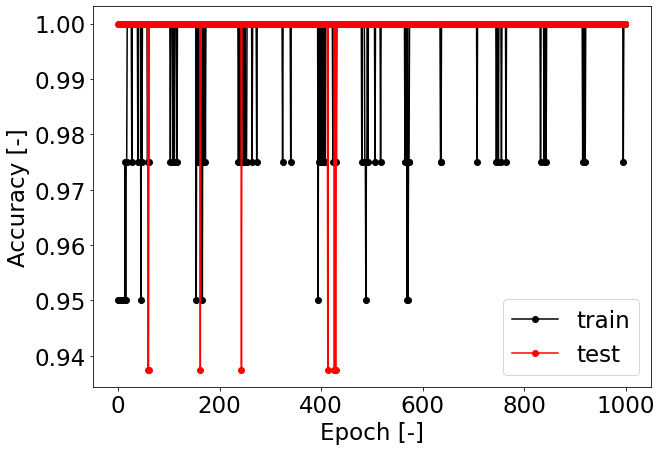

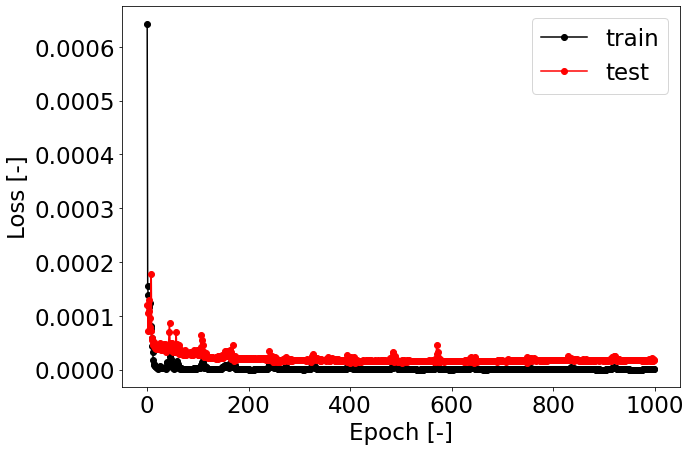

In [20]:
plt.rcParams.update({'font.size': 23})
plt.rcParams['figure.figsize'] = [10, 7]

# show the results 
#
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'],'ko-')
plt.plot(history.history['val_accuracy'],'ro-')
#plt.title('Model accuracy')
plt.ylabel('Accuracy [-]')
plt.xlabel('Epoch [-]')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'],'ko-')
plt.plot(history.history['val_loss'],'ro-')
#plt.title('model loss')
plt.ylabel('Loss [-]')
plt.xlabel('Epoch [-]')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



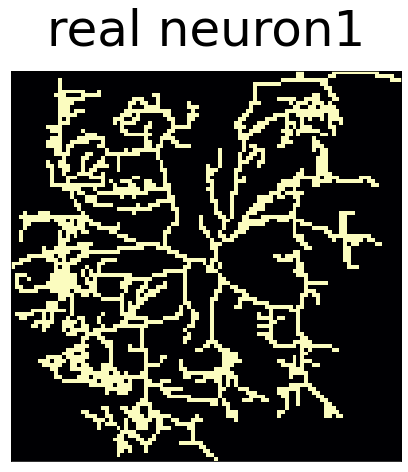

1/1 [==============================] - 0s 84ms/step
F=0.031, k=0.065


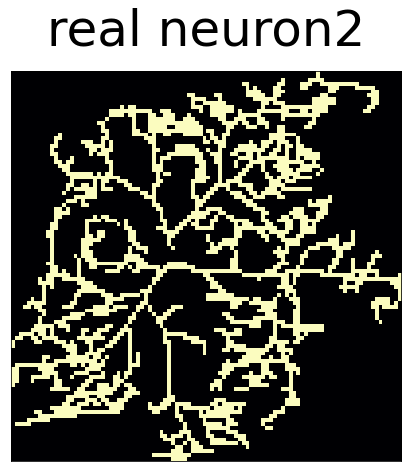

1/1 [==============================] - 0s 27ms/step
F=0.037, k=0.066


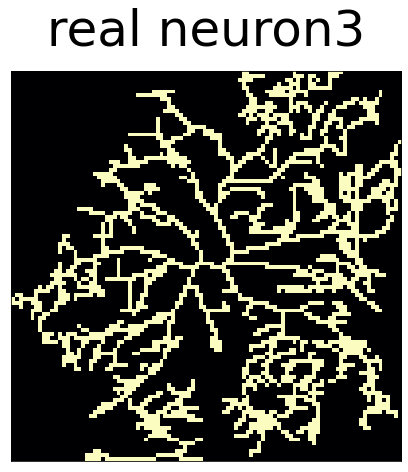

1/1 [==============================] - 0s 24ms/step
F=0.035, k=0.065


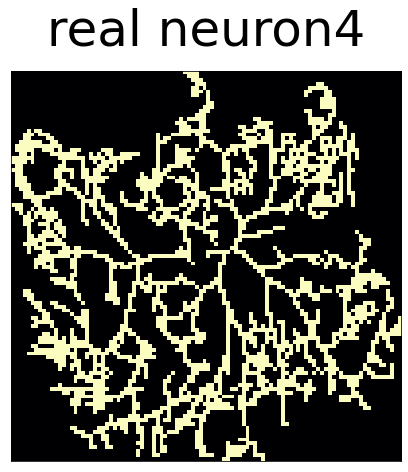

1/1 [==============================] - 0s 25ms/step
F=0.034, k=0.065


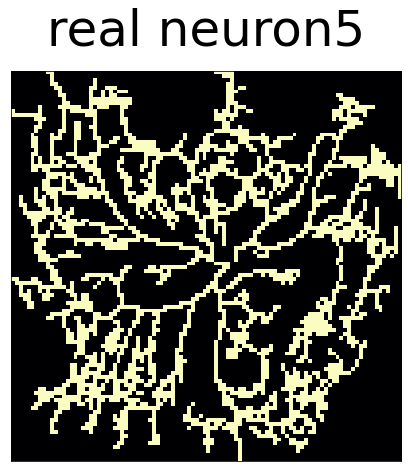

1/1 [==============================] - 0s 25ms/step
F=0.030, k=0.065


In [21]:
# here I use the fully-trained CNN to predict parameters(F,k) from real neurons
# images
#
real_neuron_num = 5
label_realneuron_array = np.zeros((real_neuron_num, 2))
for i in range(real_neuron_num):
   filename = 'real_neuron%d.mat'%(i+1)
   patterns_test = loadmat(filename) 

   patterns_test = np.array(list(patterns_test.values())) # make it an array
   plt.matshow(patterns_test[0,:,:],cmap='magma',vmin=0, vmax=1.0)
   plt.title('real neuron%d'%(i+1),fontsize=50)
   
   plt.xticks([], [])
   plt.yticks([], [])


   plt.show()
   label_realneuron = model.predict(patterns_test)
   name = 'F=%.3f, k=%.3f'%(label_realneuron[0,0],label_realneuron[0,1])
   print(name)
   # store neuron labels
   label_realneuron_array[i,0] = label_realneuron[0,0]
   label_realneuron_array[i,1] = label_realneuron[0,1]
#print(label_realneuron_array.shape)  


In [22]:
# predicted F,k parameters array
#
labels_array_nn = model.predict(patterns_mat_store)
#print(labels_array_nn.shape)

2/2 [==============================] - 0s 45ms/step


In [23]:
# tested F,k parameters array
#
labels_array_testing_nn = model.predict(patterns_mat_testing_store)
#print(labels_array_nn.shape)

1/1 [==============================] - 0s 90ms/step


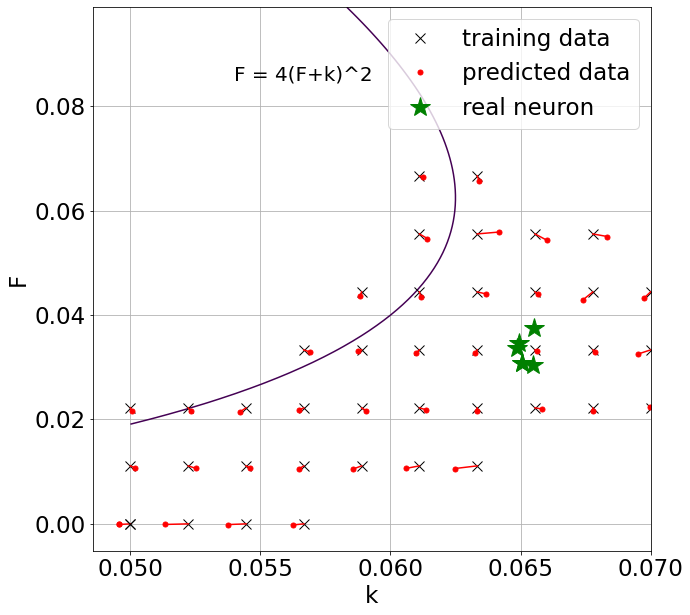

In [24]:
# here I compare the labled and predicted parameters in F-k diagram 
#
delta = 1e-3
#Frange = np.arange(0, 0.3, delta)
#krange = np.arange(0, 0.08, delta)
Frange = np.arange(0, 0.1, delta)
krange = np.arange(0.05, 0.07, delta)

k_pt, F_pt = np.meshgrid(krange,Frange)

# F is one side of the equation, G is the other
A = F_pt
B = -4.0*(F_pt + k_pt)**2.0

fig, axs = plt.subplots(1, 1)
fig.set_size_inches(10, 10)

# this bifurcation curve 
plt.contour(k_pt,F_pt,(A+B), [0])

# this is for training data
for i in range(len(labels_array_store)):
      plt.plot(labels_array_store[i,1], labels_array_store[i,0], 'kx',markersize=10)
      plt.plot(labels_array_nn[i,1], labels_array_nn[i,0], 'r.',markersize=10)

      point1 = [labels_array_store[i,1],labels_array_store[i,0]]
      point2 = [labels_array_nn[i,1], labels_array_nn[i,0]]
      x_values = [point1[0], point2[0]]
      y_values = [point1[1], point2[1]]
      plt.plot(x_values, y_values, linestyle="-",color="r")



# this is for testing data
#for i in range(len(labels_array_testing_store)):
#    plt.plot(labels_array_testing_store[i,1], labels_array_testing_store[i,0], 'gx',markersize=10)
#    plt.plot(labels_array_testing_nn[i,1], labels_array_testing_nn[i,0], 'g.',markersize=10)

#    point1 = [labels_array_testing_store[i,1],labels_array_testing_store[i,0]]
#    point2 = [labels_array_testing_nn[i,1], labels_array_testing_nn[i,0]]
#    x_values = [point1[0], point2[0]]
#    y_values = [point1[1], point2[1]]
#    plt.plot(x_values, y_values, linestyle="-",color="g")


# this is for real neuron data
for i in range(real_neuron_num):   
   plt.plot(label_realneuron_array[i,1], label_realneuron_array[i,0], 'g*',markersize=20)

plt.text(0.054, 0.085, 'F = 4(F+k)^2', fontsize = 20)

# trick for legend 
plt.plot(labels_array_store[0,1], labels_array_store[0,0], 'kx',markersize=10,label='training data')
plt.plot(labels_array_nn[0,1], labels_array_nn[0,0], 'r.',markersize=10, label='predicted data')
#plt.plot(labels_array_testing_store[0,1], labels_array_testing_store[0,0], 'gx',markersize=10,label='testing data')
#plt.plot(labels_array_testing_nn[0,1], labels_array_testing_nn[0,0], 'g.',markersize=10, label='predicted data')
plt.plot(label_realneuron_array[0,1], label_realneuron_array[0,0], 'g*',markersize=20, label='real neuron')
plt.legend()

plt.xlabel('k')
plt.ylabel('F')
plt.grid()
plt.show()